In [ ]:
'''
Name: Subash Gupta Karamsetty
Znumber: Z23689645
Assignment Number: 5
Professor: Dr. Ghoraani

This is my Colab file link:
https://colab.research.google.com/drive/12crsNJXs1VE435KDRLe4iHqSUOe21BRU#
'''

**Problem 1**

**Imported the requried modules like mnist dataset, numpy and matplotlib**

In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

**Now we loaded the training dataset and the testing dataset.**

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data() #Loading the MNIST dataset from keras.datasets

11490434/11490434 [==============================] - 0s 0us/step


**We are now showing the images count, the height and width of the images in both the training and testing datasets.**

In [4]:
print("Number of images in the training dataset: {}".format(x_train.shape[0]))  #After loading and splitting the data, The training dataset images count
print("Number of images in the testing dataset: {}".format(x_test.shape[0]))  #After loading and splitting the data, The testing dataset images count
print("Height of the each image in the training dataset: {}".format(x_train.shape[1])) #The height of each image is 28px
print("Width of the each image in the training dataset: {}".format(x_train.shape[2])) #The width of each image is 28px

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000
Height of the each image in the training dataset: 28
Width of the each image in the training dataset: 28


**This function will take array of images and its corresponding labels and will plot them each in a subplot and name each image with its associated label.**

In [5]:
def numberImagesPlot(images, labels, Number):  #This function will take array of images and its corresponding labels and will plot them each in a subplot.This function is called 3 times as asked in the question.
    plt.figure()
    plt.suptitle("The Figure set : {}".format(Number))
    images=np.array(images)                         #Converting the images list into a numpy Array.
    for i in range(1, len(labels)+1):
        plt.subplot(2,5,i)                          #subplot with the image and label. It plots all from 0 to 9.
        plt.imshow(images[i-1,:,:], cmap="gray")    #This will show the image from the images array.
        plt.title("Label : "+ str(labels[i-1]))     #This will add the label of the image selected.
    plt.show()

**Now we are shuffling the images of the datasets so that we train the model properly. We are selecting 20% of the initial training dataset as validation dataset and then we are setting the remaining 80% of the dataset as the final training dataset. Finally printing the count of the training and the validation dataset.**

In [6]:
num_of_training_Data = x_train.shape[0] #Here we are getting the number of images in the training i.e., 60,000

indexes_original = np.arange(0,num_of_training_Data) #creating an empty array of from 0 to 59999 i.e., 60,000 indexes
indexes_random = np.random.permutation(indexes_original) #we are shuffling the 60,000 indexes to generate all the indexes as a random list.

x_train = x_train[indexes_random,:,:] #creating the new training set with random images
y_train = y_train[indexes_random] #creating the labels accordingly so that the index 1 image has its respective label.

x_validate = x_train[0:int(0.2*num_of_training_Data),:,:] #splitting 20% of the randomized training data as validation data.
y_validate = y_train[0:int(0.2*num_of_training_Data)]

x_train = x_train[int(0.2*num_of_training_Data):,:,:] #setting the remaining 80% of the randomized data as the final data.
y_train = y_train[int(0.2*num_of_training_Data):]

print("After shuffling and splitting 20% of the data: ")
print("The number of images in the TRAINING DATASET: {}".format(x_train.shape[0]))
print("The number of images in the VALIDATATION DATASET: {}".format(x_validate.shape[0]))

After shuffling and splitting 20% of the data: 
The number of images in the TRAINING DATASET: 48000
The number of images in the VALIDATATION DATASET: 12000


**We are calling the above written numberImagesPlot function 3 times as asked in the question. I am fetching and passing the 0 to 9 images (Fetched after randomizing the images) and its labels to get 3 figures with each 10 subplots**

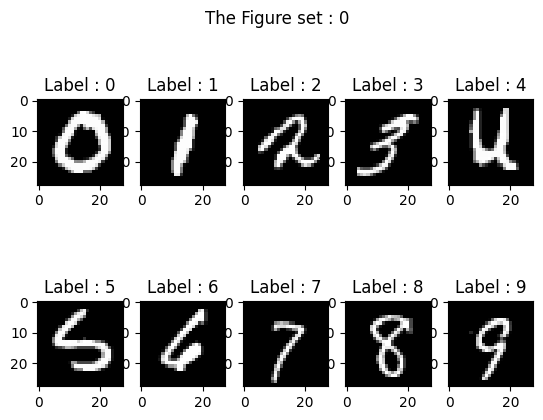

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


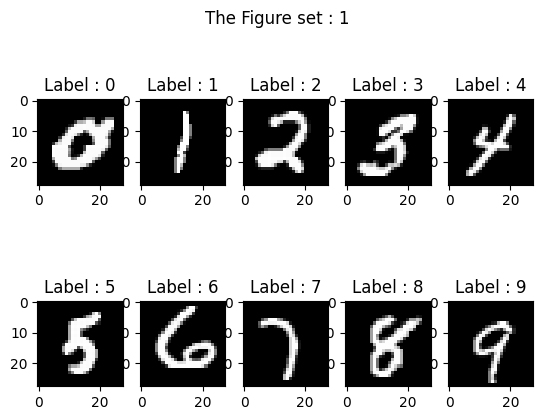

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


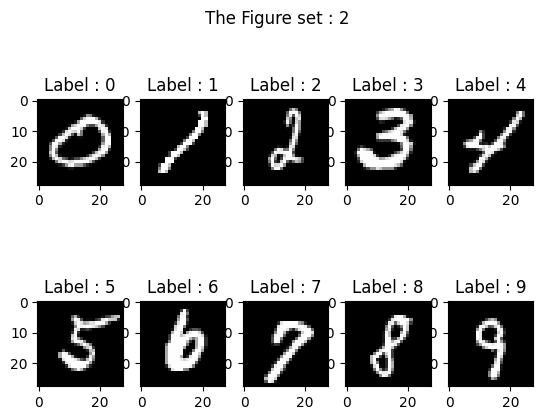

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [7]:
for i in range(3): #The for loop runs 3 times
    images=[]
    labels=[]
    for j in range(10): #This loop will help in fetching the images 0 to 9 index wise.
        image = x_train[y_train == j , :, :][i]
        ilabel = y_train[y_train == j][i]
        images.append(image)
        labels.append(ilabel)
    numberImagesPlot(images, labels,i) #Finally the image and the labels arrays which has the 0 to 9 images and its labels are passed to the plotting function
    print("*-"*40)

**Problem 2:**

**We loaded the training and the testing dataset. Then we filtered only the 0s and 1s in training and test datasets.**

In [8]:
#Selecting Only 0s and 1s from the total Mnist Dataset
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_test_01 = x_test[np.logical_or(y_test == 0, y_test == 1), :, :]  #Splitting only the 0s and 1s images from the testing dataset
y_test_01 = y_test[np.logical_or(y_test == 0, y_test == 1)]

x_train_01 = x_train[np.logical_or(y_train == 0, y_train == 1), :, :] #Splitting only the 0s and 1s images from the training dataset
y_train_01 = y_train[np.logical_or(y_train == 0, y_train == 1)]

label0 = 0
label1 = 1

**Later I randomized the training dataset and from the random training dataset, I have taken 500 samples and considered them as the validation dataset.**

In [9]:
indexes_01 = np.arange(0,x_train_01.shape[0]) #creating a range array starting from 0 to training dataset images count.
x_train_01_random_indexes = np.random.permutation(indexes_01) #using the random function to randomize the images (using indexes).

x_train_01 = x_train_01[x_train_01_random_indexes, : , :] #restructuring the new training dataset images with the randomized indexes.
y_train_01 = y_train_01[x_train_01_random_indexes]        #restructuring the new training dataset labels respectively with the randomized indexes.
print("After ramdomizing, the training samples shape is : ",x_train_01.shape)

x_val_01 = x_train_01[:500, : , :] #considering the 500 samples as validation dataset (This includes random images since randamized already)
y_val_01 = y_train_01[:500]
print("The first 500 samples cosnidered as validation set : ",x_val_01.shape)

x_train_01 = x_train_01[500:, : , :] #considering the remaining samples as the training dataset.
y_train_01 = y_train_01[500:]
print("The remaining will be the training set : ",x_train_01.shape)

After ramdomizing, the training samples shape is :  (12665, 28, 28)
The first 500 samples cosnidered as validation set :  (500, 28, 28)
The remaining will be the training set :  (12165, 28, 28)


**We have the feature plot function that will plot the 500 validation set features to finalize the threshold value.
The accuracy function will find the accuracy for all the training, testing and validation datasets**

In [10]:
def feature_plot(features, labels):
    samplenums = np.arange(features.shape[0])
    plt.plot(samplenums[labels == 0], features[labels == 0], 'bo', label = "Digit {}".format(str(label0))) #Plotting the 0s images with blue color and dot representation.
    plt.plot(samplenums[labels == 1], features[labels == 1], 'r+', label = "Digit {}".format(str(label1))) #Plotting the 1s images with red color and plus representation.
    plt.axhline(y=100, color = "brown")  #A horizontal line to represent the selected threshold. i.e. 100 based on the plot.
    plt.xlabel("Number of Image Samples")
    plt.ylabel("Average values of the 3x3 selection grid")
    plt.title("Feature average values of random 500 samples of 0s and 1s")
    plt.legend()
    plt.show()

def accuracy(actual_labels, predicted_labels):
    accuracys  = round(np.sum (actual_labels == predicted_labels)/len(actual_labels)*100,3) #Calculating the accuracy based on the similar predictions. Then the true is returned for each correct prediction. The trues are counted and the accuracy percentage is calculated and rounded to 3 digits.
    return accuracys


**Now I have obtained the feature values of each image sample of the training dataset, validation dataset and testing dataset**

In [11]:
feature_train = np.sum(x_train_01[:, 13:16, 13:16], axis = 2)  #All the 3x3 matrix values of each image is considered and they are added based on the 3rd axis i.e., the sum based on the column wise.
feature_train = np.sum(feature_train, axis=1)/9 #Now for each image all the values are added along row wise axis=1 and then divided by 9 since it is 3x3. So finally each image feature value is present in the final array.
print("The features size of the training set is : ",feature_train.shape)

feature_vali = np.sum(x_val_01[:, 13:16, 13:16], axis = 2)
feature_vali = np.sum(feature_vali, axis=1)/9
print("The features size of the validation set is : ",feature_vali.shape)

feature_test = np.sum(x_test_01[:, 13:16, 13:16], axis = 2)
feature_test = np.sum(feature_test, axis=1)/9
print("The features size of the testing set is : ",feature_test.shape)

The features size of the training set is :  (12165,)
The features size of the validation set is :  (500,)
The features size of the testing set is :  (2115,)


**As asked I have taken the validation set 500 samples feature values and plotted them accordingly with its labels. The Zeros with blue color and One's with red color.**

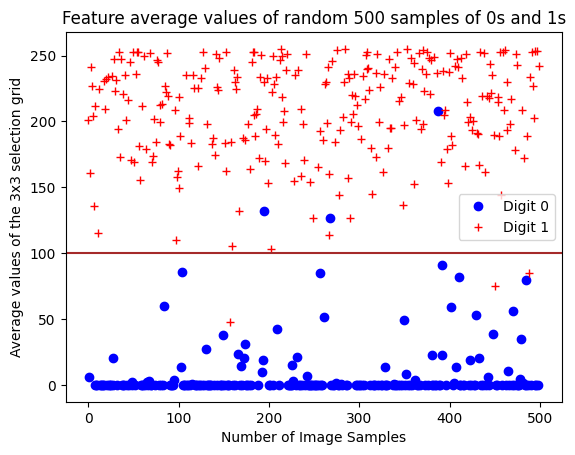

In [12]:
feature_plot(feature_vali, y_val_01) #The feature values of the validation set and the labels associated to it are passed to plot the graph.

**Now I have finalized the threshold value as 100 and then to find the training, testing, validaiton datasets accuracy's based on the threshold value, I have created the predicted labels based on the threshold value for all the training, test and validation feature values and passed to the accuracy function to get the accuracy values.**




In [14]:
threshold_from_val = 100
print("Based on the above graph we have considered the threshold value as : {}".format(str(threshold_from_val)))

y_train_predicted = np.zeros(y_train_01.shape)      #creating a array with zeros with the size of training dataset of 0s and 1s.
y_test_predicted = np.zeros(y_test_01.shape)        #creating a array with zeros with the size of testing dataset of 0s and 1s.
y_validation_predicted = np.zeros(y_val_01.shape)   #creating a array with zeros with the size of validation dataset of 0s and 1s.


y_train_predicted[feature_train <= int(threshold_from_val)] = label0   #conditionally checking and setting them to 0 if the feature value is less than or equal to the selected threshold.
y_train_predicted[feature_train > int(threshold_from_val)] = label1    #conditionally checking and setting them to 1 if the feature value is greater than the selected threshold.
print("The Training dataset accuracy is : ", accuracy(y_train_01, y_train_predicted)) #calculating the training dataset accuracy.

y_test_predicted[feature_test <= int(threshold_from_val)] = label0
y_test_predicted[feature_test > int(threshold_from_val)] = label1
print("The Testing dataset accuracy is : ", accuracy(y_test_01, y_test_predicted))  #calculating the testing dataset accuracy.

y_validation_predicted[feature_vali <= int(threshold_from_val)] = label0
y_validation_predicted[feature_vali > int(threshold_from_val)] = label1
print("The validation dataset accuracy is : ", accuracy(y_val_01, y_validation_predicted))  #calculating the validation dataset accuracy.


Based on the above graph we have considered the threshold value as : 100
The Training dataset accuracy is :  98.364
The Testing dataset accuracy is :  99.102
The validation dataset accuracy is :  98.8


In [15]:
#Completed.
# Below code will help me in downloading the code file with graphs as PDF properly.
#Referred from youtube link: https://www.youtube.com/watch?v=-Ti9Mm21uVc

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
!jupyter nbconvert --to pdf /content/Assignment4_CAP6619_SubashGuptaKaramsetty_Z23689645.ipynb